# Анализ данных на Python

*Алла Тамбовцева*

## Практикум по Pandas

В файле `final.xlsx` сохранены посты со стены сообщества Цитатник ВШЭ:

* `id`: id поста;
* `date`: дата-время публикации поста в формате POSIX;
* `text`: текст поста;
* `nlikes`: число лайков;
* `ncomments`: число комментариев. 

Загрузите данные из файла и сохраните их в датафрейм Pandas. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("final.xlsx")
df.head()

,Unnamed: 0,id,date,text,nlikes,ncomments
0,0,39858,1709297700,Историки - мы на вершине пирамиды. Все остальн...,57,2
1,1,39857,1709211300,"Очень большой поток, очень большой... Понимает...",143,0
2,2,39855,1709124900,*обсуждение тем городских исследований*\n\nП: ...,114,0
3,3,39852,1709038500,"«Я никому ничего не должна, как Анна Асти».\n\...",210,2
4,4,39848,1708952100,"""А я считаю, что женщина всегда права"".\n\n#Ма...",284,0


### Задача 1

Разбейте столбец `text` по символу `#`, чтобы получить три столбца:

* `words`: текст цитаты;
* `teacher`: имя преподавателя (как в тексте поста);
* `subject`: название курса/программы/факультета, где работает преподаватель (как в тексте поста).

Сам столбец `text` не удаляйте, просто добавьте новые три столбца к имеющемуся датафрейму. 

In [3]:
# метод split() из модуля str
# возвращает столбец со списками внутри ячеек

df["text"].str.split("#")

0       [Историки - мы на вершине пирамиды. Все осталь...
1       [Очень большой поток, очень большой... Понимае...
2       [*обсуждение тем городских исследований*\n\nП:...
3       [«Я никому ничего не должна, как Анна Асти».\n...
4       ["А я считаю, что женщина всегда права".\n\n, ...
                              ...                        
9961    [по маленькой кругленькой громов\n, Громов_hse...
9962       [Все глоки суть куздры (Данько)\n, Данько_hse]
9963    [с какого бадуна ты это написал? (Самовол)\n, ...
9964    [Синдром яндекса (Шаповалов И. А)\n, Шаповалов...
9965    [Задача тривиальна \n(Акимов Д.В.)\n, Акимов_hse]
Name: text, Length: 9966, dtype: object

In [4]:
# добавляем expand = True для растяжения списков на столбцы

df["text"].str.split("#", expand = True)

,0,1,2,3,4,5,6
0,Историки - мы на вершине пирамиды. Все остальн...,Стефанович_ВШЭ,НИС,None,None,None,None
1,"Очень большой поток, очень большой... Понимает...",Белов_ВШЭ,ИГР,None,None,None,None
2,*обсуждение тем городских исследований*\n\nП: ...,Дохов_ВШЭ,ТРГиИС,None,None,None,None
3,"«Я никому ничего не должна, как Анна Асти».\n\n",Таланов_ВШЭ,МПП,None,None,None,None
4,"""А я считаю, что женщина всегда права"".\n\n",Маскаева_ВШЭ,АдминистративноеПраво,None,None,None,None
...,...,...,...,...,...,...,...
9961,по маленькой кругленькой громов\n,"Громов_hse\n_____________________\nПожалуйста,...",None,None,None,None,None
9962,Все глоки суть куздры (Данько)\n,Данько_hse,None,None,None,None,None
9963,с какого бадуна ты это написал? (Самовол)\n,Самовол_hse,None,None,None,None,None
9964,Синдром яндекса (Шаповалов И. А)\n,Шаповалов_hse,None,None,None,None,None


In [5]:
# собираем все вместе
# забираем три столбца с 0 по 3
# присваиваем названия столбцам
# приклеиваем их к исходному df справа

new = df["text"].str.split("#", expand = True).iloc[:, 0:3]
new.columns = ["words", "teacher", "subject"]
df = pd.concat([df, new], axis = 1)
df.head()

,Unnamed: 0,id,date,text,nlikes,ncomments,words,teacher,subject
0,0,39858,1709297700,Историки - мы на вершине пирамиды. Все остальн...,57,2,Историки - мы на вершине пирамиды. Все остальн...,Стефанович_ВШЭ,НИС
1,1,39857,1709211300,"Очень большой поток, очень большой... Понимает...",143,0,"Очень большой поток, очень большой... Понимает...",Белов_ВШЭ,ИГР
2,2,39855,1709124900,*обсуждение тем городских исследований*\n\nП: ...,114,0,*обсуждение тем городских исследований*\n\nП: ...,Дохов_ВШЭ,ТРГиИС
3,3,39852,1709038500,"«Я никому ничего не должна, как Анна Асти».\n\...",210,2,"«Я никому ничего не должна, как Анна Асти».\n\n",Таланов_ВШЭ,МПП
4,4,39848,1708952100,"""А я считаю, что женщина всегда права"".\n\n#Ма...",284,0,"""А я считаю, что женщина всегда права"".\n\n",Маскаева_ВШЭ,АдминистративноеПраво


### Задача 2

Найдите преподавателя, чей пост набрал больше всего лайков, и выведите на экран имя преподавателя и текст поста.

In [6]:
m = df["nlikes"].max()

# сама строка полностью
df[df["nlikes"] == m]

,Unnamed: 0,id,date,text,nlikes,ncomments,words,teacher,subject
8421,8421,5332,1418841392,Я получил письмо от вашей группы с просьбой по...,1923,4,Я получил письмо от вашей группы с просьбой по...,Федоровых_hse,None


In [7]:
# только цитата
df[df["nlikes"] == m]["words"].values[0]

'Я получил письмо от вашей группы с просьбой посвятить следующий семинар характеристике текущей ситуации в российской экономике. Но для характеристики ситуации в российской экономике можно не тратить целый семинар, хватит всего одного слова. \n(Федоровых Д.А., эконом, 17.12.2014)\n'

In [8]:
# только имя
df[df["nlikes"] == m]["teacher"].values[0]

'Федоровых_hse'

### Задача 3

Напишите программу, которая запрашивает с клавиатуры названия трёх курсов/программ через запятую и сохраняет в файл Excel строки датафрейма, соответствующие запросу.

In [9]:
# смотрим на значения в subject 

df["subject"].value_counts()

Философия              297
ИГПЗС                  144
философия              118
Социология              85
Психология              77
                      ... 
Sociological_Theory      1
Немецкий_язык            1
Актуарные_Расчёты        1
Каллиграфия              1
Кононенко_hse            1
Name: subject, Length: 1804, dtype: int64

In [12]:
# для примера выбираем Философия,Социология,Психология
inp = input().split(",")

Философия,Социология,Психология


In [13]:
# вариант 1: менее общий
# ищем точные соответствия

chosen = df[df["subject"].isin(inp)]
chosen.to_excel("user_chose.xlsx")

In [14]:
# вариант 2: более общий
# ищем частичные соответствия без учета регистра


# избавляемся от пропусков NaN в subject
# заполняем их пустой строкой

df["subject"].fillna("", inplace = True)

# объединяем слова из inp через ИЛИ
# помещаем в contains и выключаем учет регистра

chosen = df[df["subject"].str.contains("|".join(inp), case = True)]
chosen

,Unnamed: 0,id,date,text,nlikes,ncomments,words,teacher,subject
43,43,39690,1705491000,С: Вы же у нас самый главный в социологии.\nП:...,142,1,С: Вы же у нас самый главный в социологии.\nП:...,Гофман_ВШЭ,Социология_культуры
56,56,39636,1704196200,"Будем изучать как чиновники строят дорожки, а ...",137,0,"Будем изучать как чиновники строят дорожки, а ...",Богачёв_ВШЭ,Социология
57,57,39633,1704109800,"""Я чё, не русский? Дайте водку!""\n\n#Габов_ВШЭ...",112,2,"""Я чё, не русский? Дайте водку!""\n\n",Габов_ВШЭ,Социология
113,113,39401,1699356600,Стресс полезен для студентов.\n\n#Симонова_ВШЭ...,126,0,Стресс полезен для студентов.\n\n,Симонова_ВШЭ,Социология
207,207,38970,1691063400,"Если вы смогли протусить 5 часов в клубе, прий...",287,2,"Если вы смогли протусить 5 часов в клубе, прий...",Крупец_ВШЭ,Социология
...,...,...,...,...,...,...,...,...,...
7655,7655,8636,1475048820,И все таки мы секта.\n\n#Астахов_hse #Философия,68,0,И все таки мы секта.\n\n,Астахов_hse,Философия
7682,7682,8532,1474832043,"""К идеям Дугина я отношусь... скептически""\n\n...",30,5,"""К идеям Дугина я отношусь... скептически""\n\n",Гофман_hse,Социология
7701,7701,8493,1474735320,"Вам кажется, что это какая-то лажа, а это наук...",124,0,"Вам кажется, что это какая-то лажа, а это наук...",Александров_HSE,Социология
7859,7859,7814,1465555504,Вы не равны по жизненным шансам\n\n#Симонова_h...,81,0,Вы не равны по жизненным шансам\n\n,Симонова_hse,Социология


### Задача 4

Добавьте в датафрейм столбец `date_time` с датой и временем поста в формате *datetime*. Хранить метку времени в таком формате удобно, так как, во-первых, дата и время представлены в понятном формате, а во-вторых, при сортировке или построении графиков для динамики строки будут упорядочиваться в правильном хронологическом порядке.

**Подсказка:** функция `.to_datetime()`.

In [15]:
# забираем метку времени в unix-формате
# число секунд с 1 января 1970 года
# переводим в формат datetime из единиц измерения = секунды (s)

df["date_time"] = pd.to_datetime(df["date"], unit = "s")
df.head()

,Unnamed: 0,id,date,text,nlikes,ncomments,words,teacher,subject,date_time
0,0,39858,1709297700,Историки - мы на вершине пирамиды. Все остальн...,57,2,Историки - мы на вершине пирамиды. Все остальн...,Стефанович_ВШЭ,НИС,2024-03-01 12:55:00
1,1,39857,1709211300,"Очень большой поток, очень большой... Понимает...",143,0,"Очень большой поток, очень большой... Понимает...",Белов_ВШЭ,ИГР,2024-02-29 12:55:00
2,2,39855,1709124900,*обсуждение тем городских исследований*\n\nП: ...,114,0,*обсуждение тем городских исследований*\n\nП: ...,Дохов_ВШЭ,ТРГиИС,2024-02-28 12:55:00
3,3,39852,1709038500,"«Я никому ничего не должна, как Анна Асти».\n\...",210,2,"«Я никому ничего не должна, как Анна Асти».\n\n",Таланов_ВШЭ,МПП,2024-02-27 12:55:00
4,4,39848,1708952100,"""А я считаю, что женщина всегда права"".\n\n#Ма...",284,0,"""А я считаю, что женщина всегда права"".\n\n",Маскаева_ВШЭ,АдминистративноеПраво,2024-02-26 12:55:00


### Задача 5

Проделайте аналогичную операцию с метками времени, только представьте их не в формате *datetime*, а в виде обычных строк (тип *object*, который в Pandas соответствует базовому типу *string*). Используя форматирование строк для дат, извлеките название месяца и название дня недели и сохраните их в столбцы `month` и `weekday` соответственно.

**NB.** Коды (обозначения) для разных шаблонов строк с датой-временем можно посмотреть [здесь](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [16]:
# помимо str в pandas есть модуль dt для работы с датой-временем
# вызываем методы не просто, а через dt

# strftime - string formatted time, строка с отформатированной датой
# здесь в шаблон для форматирования включаем месяц %B и день недели %A

df["month"] = df["date_time"].dt.strftime("%B")
df["weekday"] = df["date_time"].dt.strftime("%A")

# несколько строк для примера
df.loc[:, "date_time":].head()

,date_time,month,weekday
0,2024-03-01 12:55:00,March,Friday
1,2024-02-29 12:55:00,February,Thursday
2,2024-02-28 12:55:00,February,Wednesday
3,2024-02-27 12:55:00,February,Tuesday
4,2024-02-26 12:55:00,February,Monday


### Задача 6

Сгруппируйте строки по дням недели и определите, в какие дни недели:

* публикуется больше всего/меньше всего постов;
* посты получают наибольшее/наименьшее число комментариев.

In [17]:
# id поста точно всегда заполнено, выбираем его
# count считает число заполненных ячеек

df.groupby("weekday")["id"].count()

weekday
Friday       1416
Monday       1351
Saturday     1339
Sunday       1223
Thursday     1507
Tuesday      1550
Wednesday    1580
Name: id, dtype: int64

In [18]:
# сортируем по убыванию

df.groupby("weekday")["id"].count().sort_values(ascending = False)

weekday
Wednesday    1580
Tuesday      1550
Thursday     1507
Friday       1416
Monday       1351
Saturday     1339
Sunday       1223
Name: id, dtype: int64

In [19]:
# выбираем ncomments, но считаем уже сумму
# суммарное число комментариев за каждый день недели

df.groupby("weekday")["ncomments"].sum().sort_values(ascending = False)

weekday
Tuesday      1585
Wednesday    1486
Thursday     1377
Friday       1235
Monday       1229
Sunday       1156
Saturday     1117
Name: ncomments, dtype: int64

### Задача 7

Выберите строки датафрейма, которые соответствуют постам за 1-2 модули 2023-2024 учебного года и сохраните их в датфрейм `small`. 
Добавьте в датафрейм `small` столбец `module`, который соответствует номеру модуля обучения в Вышке (см. академический [календарь](https://www.hse.ru/studyspravka/grafik/)).

**Подсказка:** функция `pd.Timestamp()`.

In [21]:
# 1-2 модули считаем с 01-09-2023 по 31-12-2023
# переводим эти одиночные даты в формат datetime
# год, месяц, день

print(pd.Timestamp(2023, 9, 1))
print(pd.Timestamp(2023, 12, 31))

2023-09-01 00:00:00
2023-12-31 00:00:00


In [22]:
# используем эти метки в условиях для фильтрации

small = df[(df["date_time"] >= pd.Timestamp(2023, 9, 1)) & \
   (df["date_time"] <= pd.Timestamp(2023, 12, 31))]

In [23]:
# для столбца с модулем пишем функцию, 
# которая делит значения по дате 02-11-2023

small["module"] = small["date_time"].apply(lambda x: 1 if x < pd.Timestamp(2023, 11, 2) else 2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
# предупреждение выше – работаем с копиями столбцов ради сохранности данных
# это нормально, но если смущает, можем выключить такой тип предупреждений :)

pd.options.mode.chained_assignment = None

In [25]:
# и тишина...

small["module"] = small["date_time"].apply(lambda x: 1 if x < pd.Timestamp(2023, 11, 2) else 2)

### Задача 8

Выберите строки датафрейма, который соответствуют первому модулю 2023-2024 учебного года и постройте для полученного датафрейма график, отражающий динамику числа лайков в течение модуля (по горизонтальной оси – дата, по вертикальной – суммарное число лайков в день).

In [26]:
# фильтруем

mod01 = small[small["module"] == 1]

# проверяем уникальные значения – что не забрали лишнее

mod01["module"].unique()

array([1])

In [27]:
# по аналогии с задачей 5 добавляем столбец только с датой 
# без времени и года, год везде один

mod01["day"] = mod01["date_time"].dt.strftime("%b %d")
mod01["day"].head()

119    Nov 01
120    Oct 31
121    Oct 30
122    Oct 29
123    Oct 28
Name: day, dtype: object

In [28]:
# группируем по дате и суммируем лайки по дням

res = mod01.groupby("day")["nlikes"].sum()
res.head()

day
Nov 01    133
Oct 02    125
Oct 03    133
Oct 04    113
Oct 05    258
Name: nlikes, dtype: int64

In [29]:
# в x даты, в y частоты
# matplotlib принимает без предупреждений массивы/списки
# values – уже массив, а index – отдельный тип index

x = list(res.index)
y = res.values

In [30]:
from matplotlib import pyplot as plt

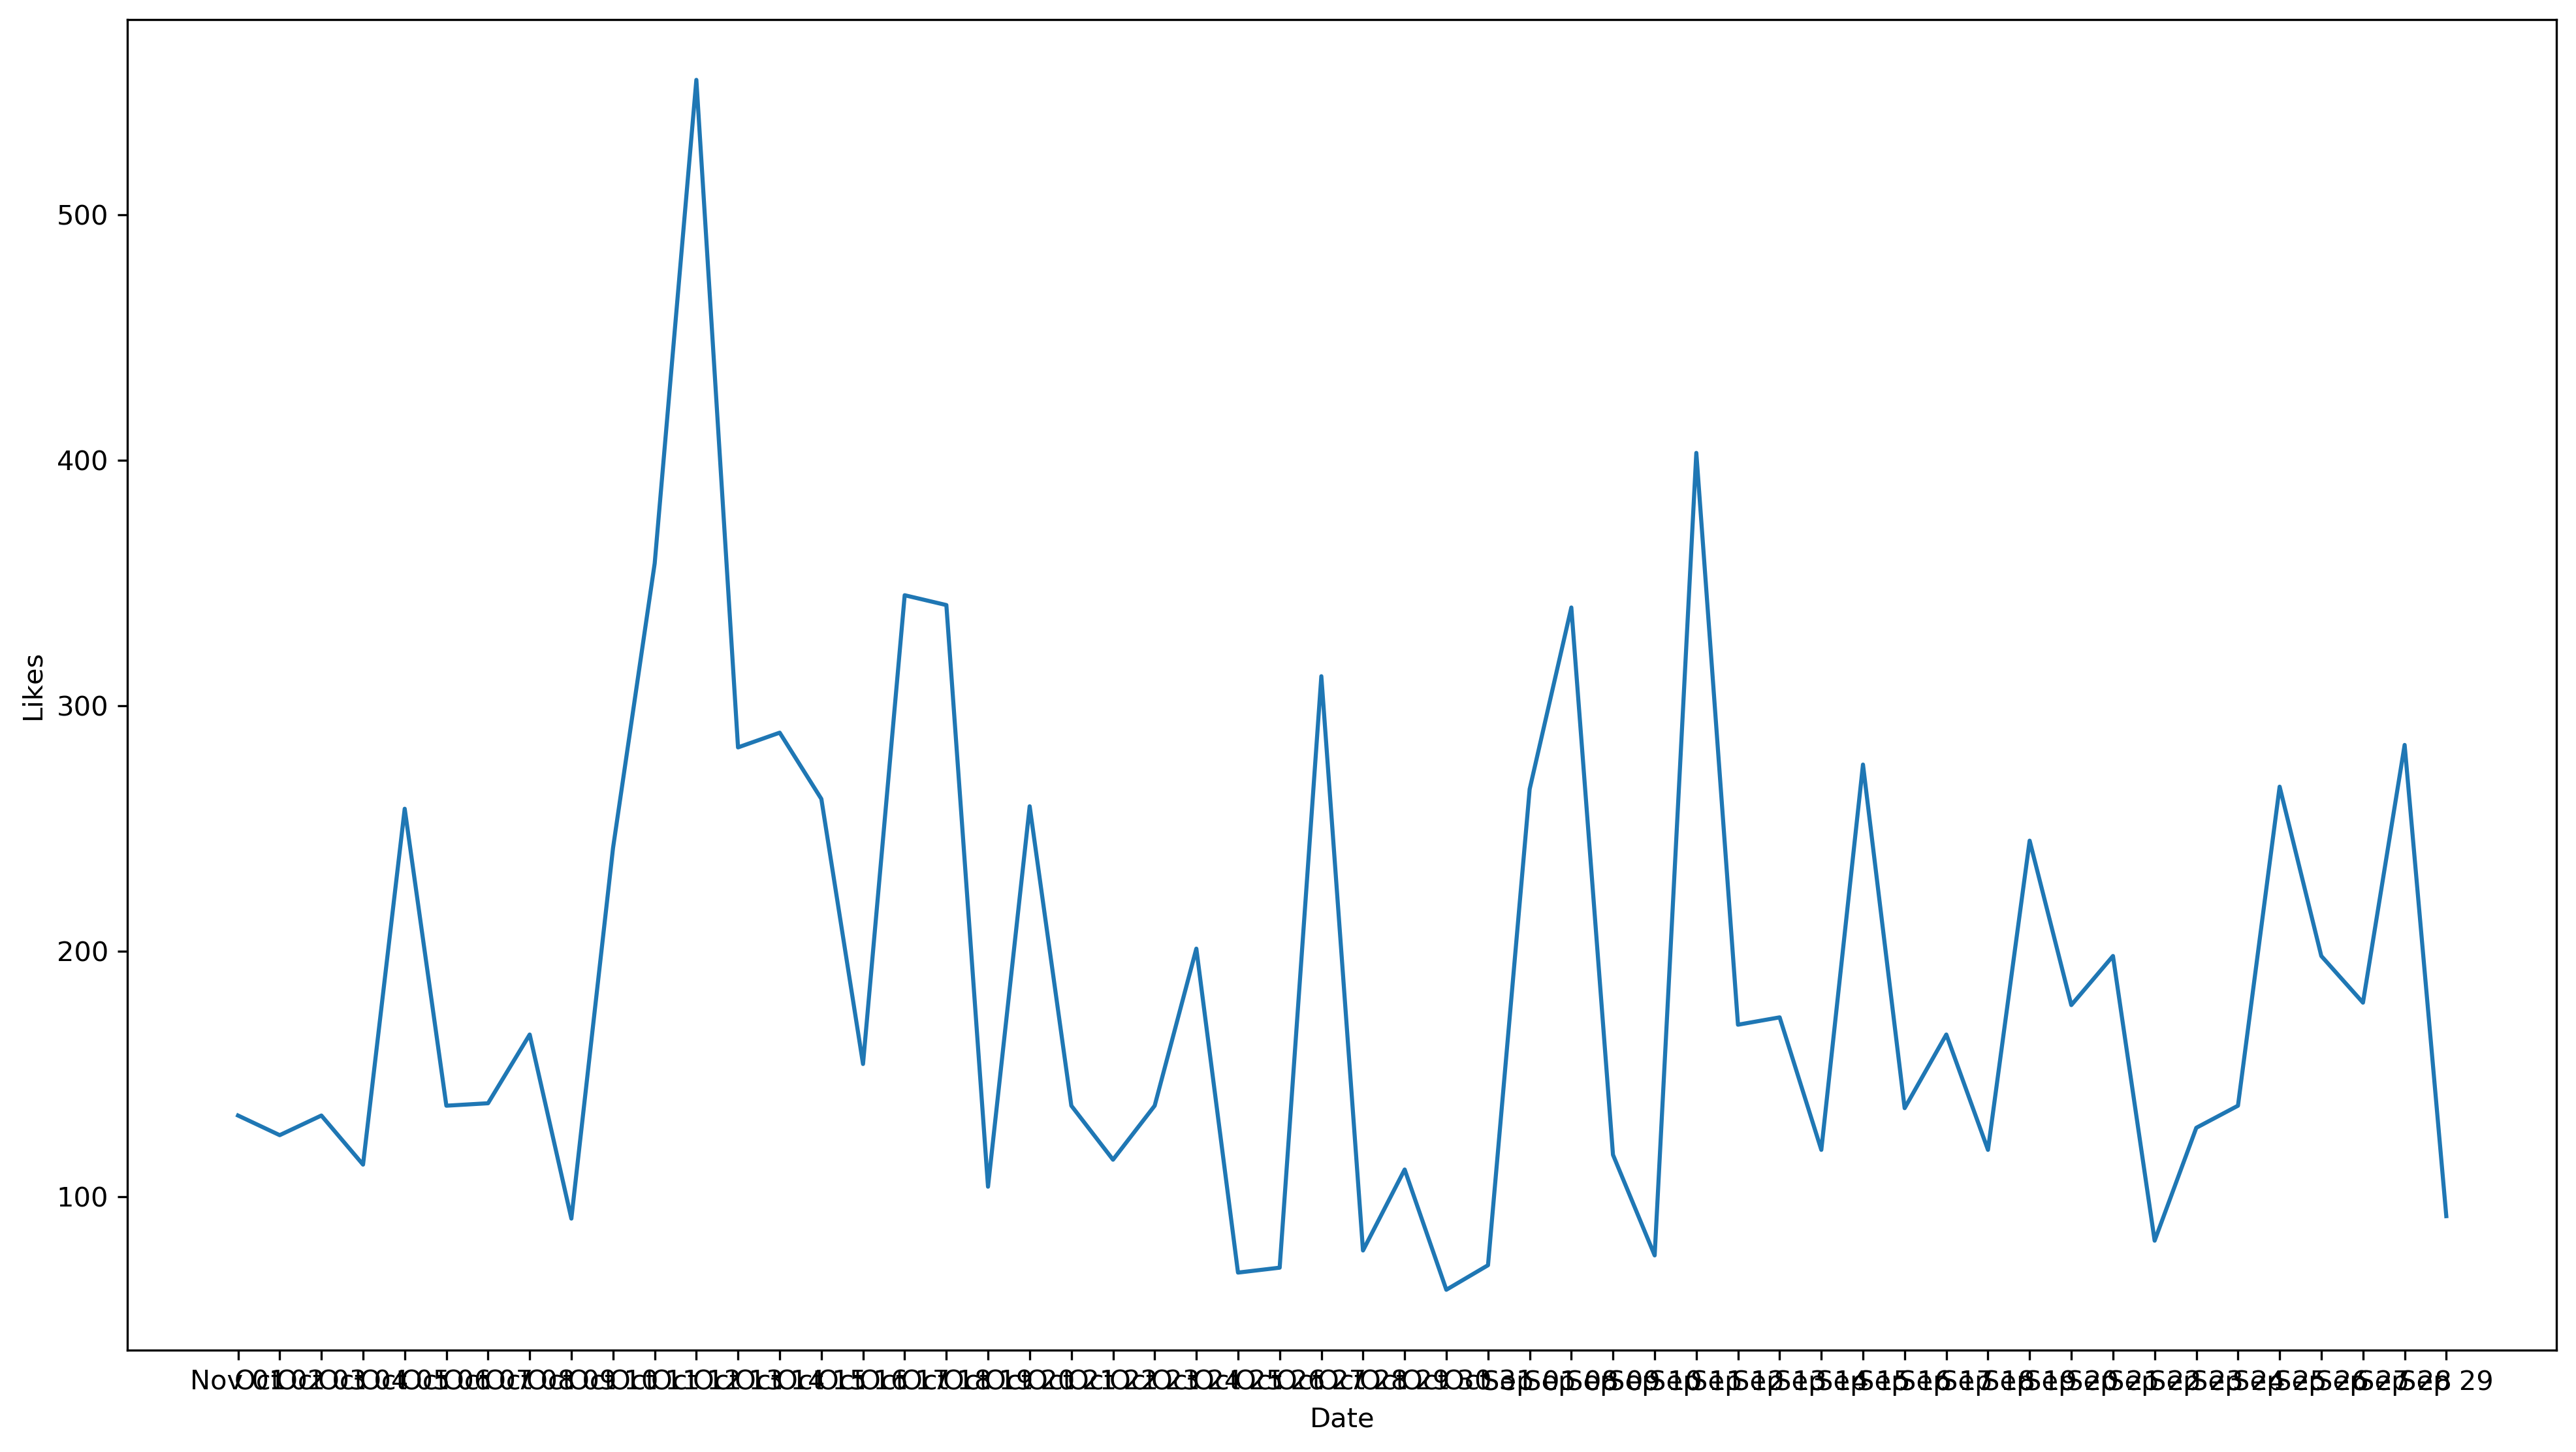

In [31]:
# строим график
# plot(): обычный график, точки, соединенные линиями

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.plot(x, y);
ax.set_xlabel("Date");
ax.set_ylabel("Likes");

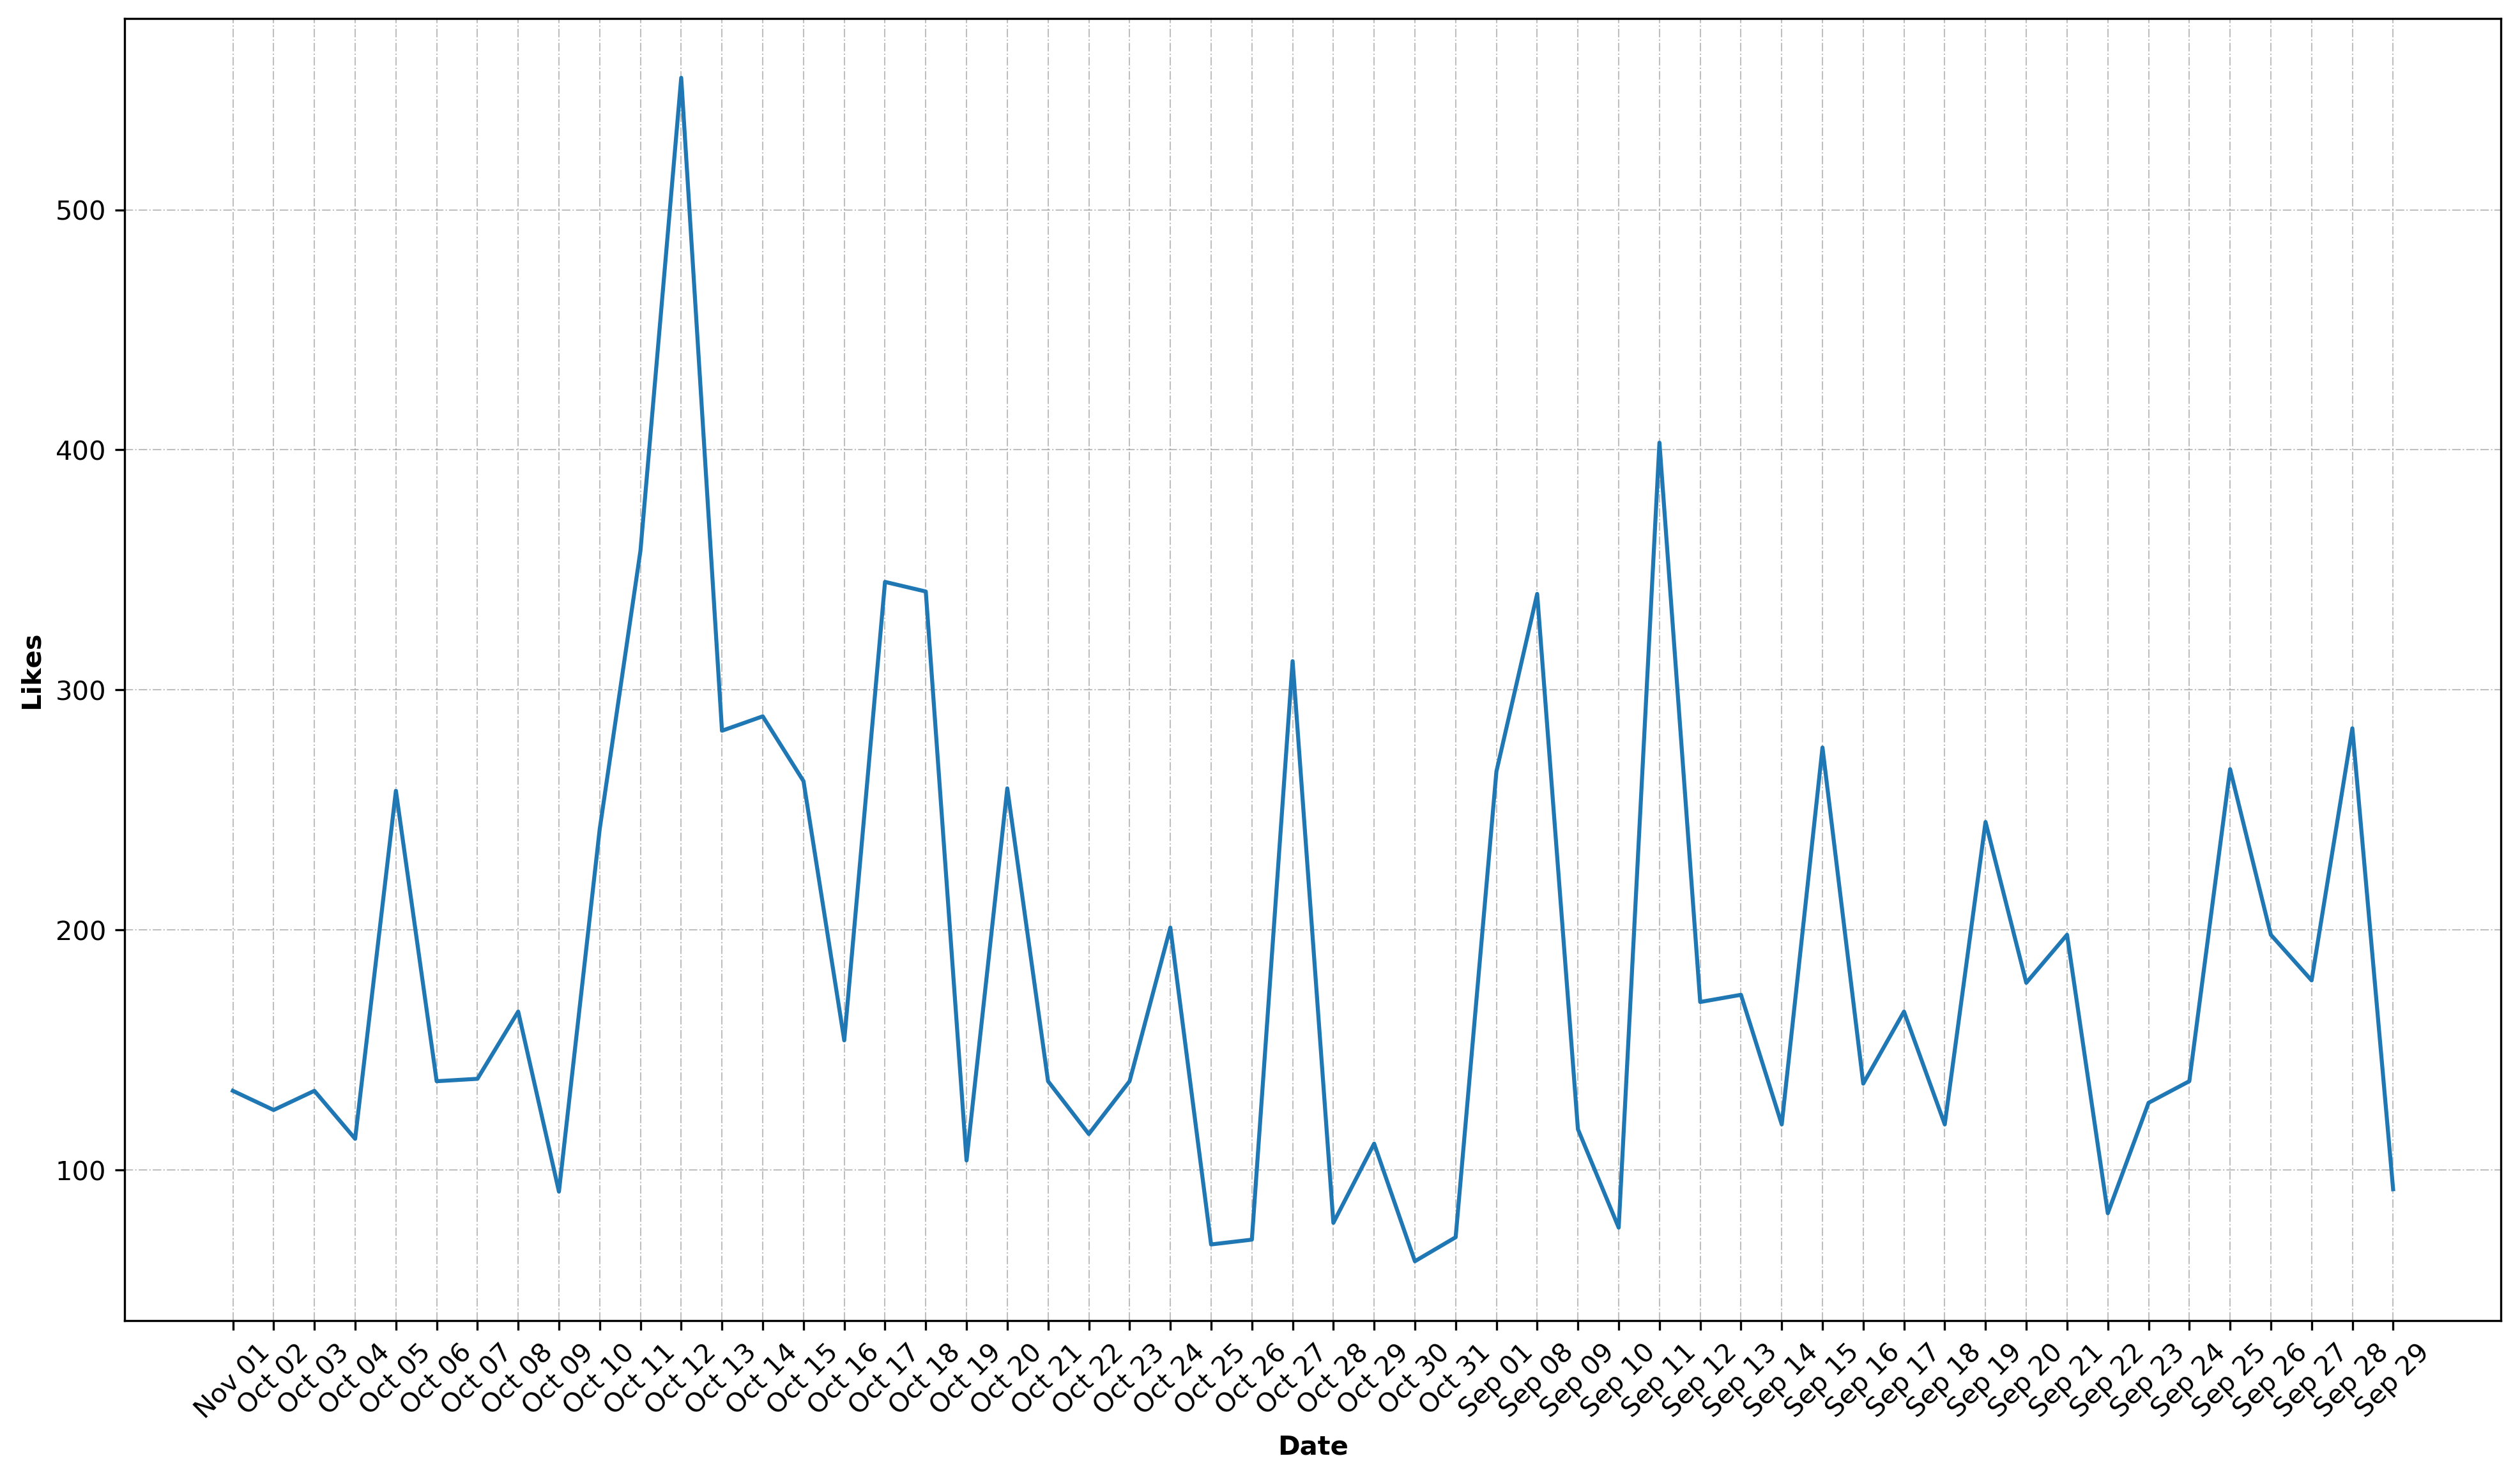

In [32]:
# дорабатываем график

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

ax.plot(x, y);

# делаем подписи к осям полужирными
# подписи к засечкам по оси x поворачиваем на 45 градусов

ax.set_xlabel("Date", fontweight = "bold");
ax.set_ylabel("Likes", fontweight = "bold");
ax.tick_params(axis = 'x', labelrotation = 45);

# добавляем координатную сетку grid
# alpha – прозрачность

ax.grid(color = "grey", linestyle = "-.", 
       linewidth = 0.5, alpha = 0.5);

fig.savefig("lineplot.png")